In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [87]:
GRI_df = pd.read_csv("./data/Gross_Receipts_by_Industry.csv")

In [88]:
GRI_df.head()

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
0,200500A,311600.0,Animal Slaughtering and Processing,4,$0.00
1,200500A,441210.0,Recreational vehicle dealers (including motor ...,1,$0.00
2,200500A,444110.0,Home centers,12,$53131236.00
3,200600A,326000.0,Plastics & rubber products mfg.,36,$35542598.00
4,200600A,541360.0,Geophysical surveying & mapping services,24,$4186978.00


In [89]:
GRI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3719 entries, 0 to 3718
Data columns (total 5 columns):
TAX PERIOD                   3719 non-null object
NAICS                        3706 non-null float64
PRIMARY NAICS DESCRIPTION    3706 non-null object
LOCATION COUNT               3719 non-null int64
TOTAL MEASURE                3719 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 145.4+ KB


In [90]:
GRI_df.isnull().sum()

TAX PERIOD                    0
NAICS                        13
PRIMARY NAICS DESCRIPTION    13
LOCATION COUNT                0
TOTAL MEASURE                 0
dtype: int64

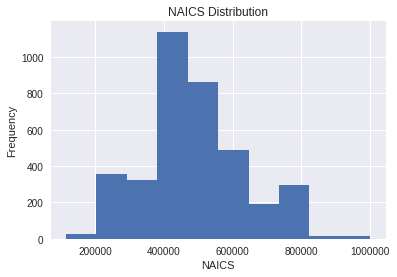

In [91]:
GRI_df["NAICS"].plot(kind="hist")
plt.xlabel("NAICS")
plt.title("NAICS Distribution")
plt.show()

* locating the NaN values

In [92]:
GRI_df[GRI_df.isnull().any(axis=1)]


,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
353,201600A,NaN,NaN,79219,$25512012052.98
445,200500A,NaN,NaN,275449,$53876091824.76
618,200700A,NaN,NaN,279710,$56988318691.04
750,201400A,NaN,NaN,147999,$32560732877.31
1086,201500A,NaN,NaN,121720,$28330182828.78
1314,201700A,NaN,NaN,2494,$189467096.64
1315,201300A,NaN,NaN,170535,$36766679156.18
1547,201200A,NaN,NaN,187605,$39458834501.82
1904,200900A,NaN,NaN,238473,$53072021587.10
2414,200800A,NaN,NaN,257432,$56369945841.98


In [93]:
GRI_df["NAICS"].fillna((GRI_df["NAICS"].mean()), inplace= True)

## Turn Total Measure to Numeric

In [94]:
#removing the dollar sign
GRI_df["TOTAL MEASURE"] =GRI_df["TOTAL MEASURE"].apply(lambda x:x.strip('$'))

In [95]:
GRI_df["TOTAL MEASURE"][10]

'18288252.00'

In [99]:
GRI_df["TOTAL MEASURE"].dtype

dtype('float64')

In [100]:
GRI_df["TOTAL MEASURE"] = GRI_df["TOTAL MEASURE"].astype(float)

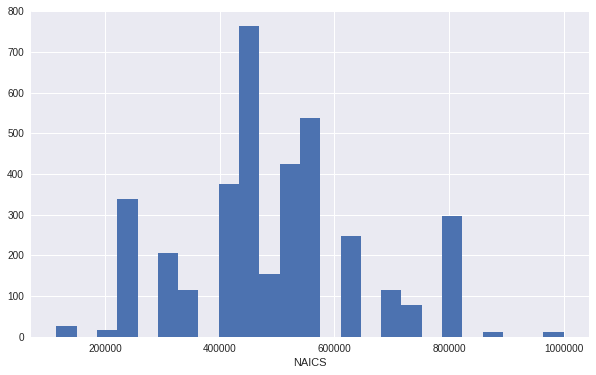

In [101]:
x = GRI_df["NAICS"]
plt.figure(figsize=(10,6))
plt.hist(x, bins=25)
plt.xlabel("NAICS")
plt.show()

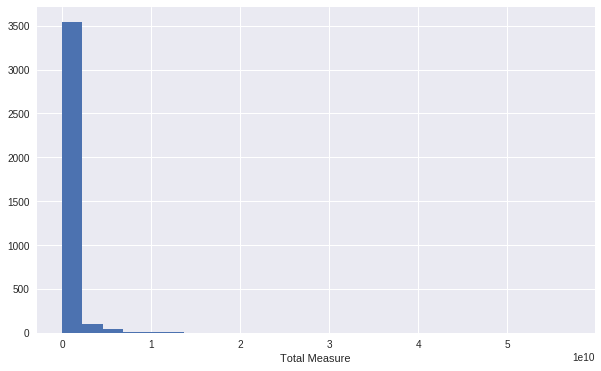

In [125]:
x = GRI_df["TOTAL MEASURE"]
plt.figure(figsize=(10,6))
plt.hist(x, bins=25)
plt.xlabel("Total Measure")
plt.show()


In [143]:
np.mean(GRI_df["TOTAL MEASURE"])

619132342.66667914

In [144]:
np.max(GRI_df["TOTAL MEASURE"])

56988318691.040001

In [145]:
np.min(GRI_df["TOTAL MEASURE"])

0.0

In [153]:
GRI_df.groupby(["TOTAL MEASURE"]).get_group(56988318691.040001)

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
618,200700A,495156.411765,NaN,279710,5.698832e+10


In [154]:
GRI_df.groupby(["TOTAL MEASURE"]).get_group(0.0)

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
0,200500A,311600.0,Animal Slaughtering and Processing,4,0.0
1,200500A,441210.0,Recreational vehicle dealers (including motor ...,1,0.0
8,200500A,513330.0,Telecommunications Resellers,1,0.0
13,200600A,441210.0,Recreational vehicle dealers (including motor ...,1,0.0
14,200600A,485410.0,School & employee bus transportation,12,0.0
19,200600A,712100.0,"Museums, historical sites, & similar institutions",2,0.0
24,200700A,441210.0,Recreational vehicle dealers (including motor ...,3,0.0
33,200800A,712100.0,"Museums, historical sites, & similar institutions",4,0.0
36,200600A,454112.0,Electronic auctions,2,0.0
76,201700A,523130.0,Commodity contracts dealers,4,0.0


In [147]:
np.mean(GRI_df["LOCATION COUNT"])

1594.95267545039

In [148]:
np.max(GRI_df["LOCATION COUNT"])

286154

In [149]:
np.min(GRI_df["LOCATION COUNT"])

1

* Total Measures based on NAICS

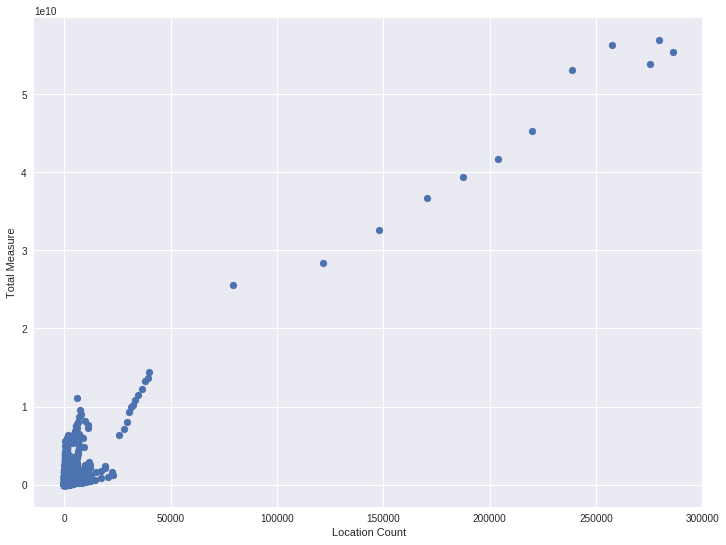

In [142]:
y = GRI_df["TOTAL MEASURE"]
x = GRI_df["LOCATION COUNT"]
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel("Location Count")
plt.ylabel("Total Measure")
plt.show()

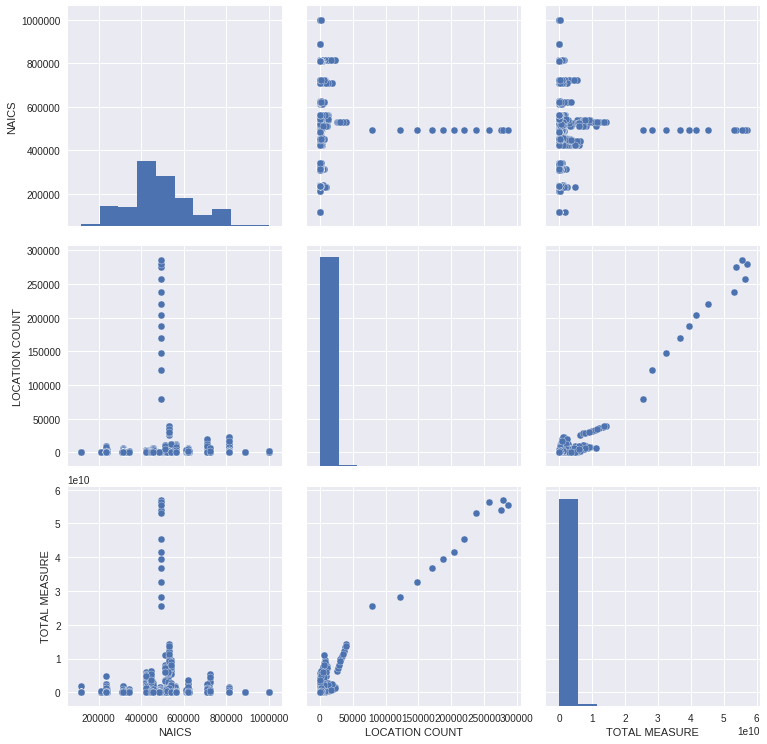

In [103]:
sns.pairplot(GRI_df, size = 3.5)

In [104]:
GRI_df.columns

Index(['TAX PERIOD', 'NAICS', 'PRIMARY NAICS DESCRIPTION', 'LOCATION COUNT',
       'TOTAL MEASURE'],
      dtype='object')

In [105]:
GRI_df["TAX PERIOD"].unique()

array(['200500A', '200600A', '201500A', '200900A', '200800A', '200700A',
       '201000A', '201100A', '201200A', '201600A', '201400A', '201300A',
       '201700A'], dtype=object)

In [140]:
to_drop = ["TAX PERIOD","PRIMARY NAICS DESCRIPTION"]

GRI_corr_df = GRI_df.drop(to_drop,axis =1)
GRI_corr_df = GRI_corr_df.corr()

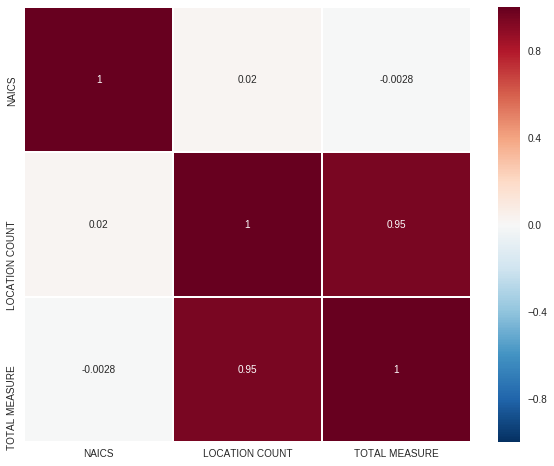

In [138]:
fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(GRI_corr_df, annot=True, linewidths= .5, ax = ax)

* Based on the heatmap:
----
* Location Count and Total Measure are high correlated (%95)
* There is no correlation between NAICS and other features

## Groupby TAX PERIOD

* TAX PERIOD 2017:

In [106]:
Tax_2017_df = GRI_df.groupby(["TAX PERIOD"]).get_group("201700A")
Tax_2017_df.head()

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
70,201700A,485300.0,Taxi & limousine service,25,108308.0
76,201700A,523130.0,Commodity contracts dealers,4,0.0
80,201700A,561790.0,Other services to buildings & dwellings,63,2408833.0
85,201700A,423700.0,"Hardware, & plumbing & heating equipment & su...",2,0.0
96,201700A,541800.0,Advertising & related services,101,6184044.0


In [108]:
GRI_df.head()

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
0,200500A,311600.0,Animal Slaughtering and Processing,4,0.0
1,200500A,441210.0,Recreational vehicle dealers (including motor ...,1,0.0
2,200500A,444110.0,Home centers,12,53131236.0
3,200600A,326000.0,Plastics & rubber products mfg.,36,35542598.0
4,200600A,541360.0,Geophysical surveying & mapping services,24,4186978.0


### In 2017 Tax Period Total Measure = 0.0

In [114]:
TM_0 = Tax_2017_df.groupby(["TOTAL MEASURE"]).get_group(0.0)
TM_0.head()

,TAX PERIOD,NAICS,PRIMARY NAICS DESCRIPTION,LOCATION COUNT,TOTAL MEASURE
76,201700A,523130.0,Commodity contracts dealers,4,0.0
85,201700A,423700.0,"Hardware, & plumbing & heating equipment & su...",2,0.0
109,201700A,811420.0,Reupholstery & furniture repair,3,0.0
148,201700A,312000.0,Beverage & tobacco product mfg.,1,0.0
211,201700A,234110.0,Highway and Street Construction (1997 NAICS),1,0.0


In [116]:
TM_0.shape

(68, 5)

### In year 2017-- Tax Period " 68 " Primary Descriptions had " 0.0 " Total Measure

In [118]:
tm_0_des = TM_0["PRIMARY NAICS DESCRIPTION"].value_counts()

In [120]:
tm_0_des[:10]

Hardware, & plumbing & heating equipment  & supplies    1
Rooming & boarding houses                               1
Structural Steel Erection Contractors (1997 NAICS)      1
Offices of optometrists                                 1
Business to business electronic markets                 1
Other chemical products & preparation mfg.              1
Mail-order houses                                       1
Farm supplies                                           1
Sugar & confectionery product mfg.                      1
Lumber & other construction materials                   1
Name: PRIMARY NAICS DESCRIPTION, dtype: int64